In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
class Const: 
    def __init__(self):
        self.n_trials = 1
        self.n_animals = 200 
        self.n_steps = 500
        self.speed = 0.02
        self.arena_size = 3
        self.infection_distance = 0.1**2

In [13]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        x = np.random.uniform(low = 0, high = c.arena_size, size=c.n_animals)
        y = np.random.uniform(low = 0, high = c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals) * c.speed
        vy = np.zeros(c.n_animals) * c.speed
        stats = np.zeros(c.n_steps)
        infected = np.zeros(c.n_animals)
        infected[0] = 1
        stats = np.zeros(c.n_steps)


        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) 
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            vx = np.random.randn(c.n_animals)*c.speed
            vy = np.random.randn(c.n_animals)*c.speed
    
            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size,y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x,c.arena_size)) # <------------------- Keep them in enclosure
            y = np.maximum(0,np.minimum(y,c.arena_size))
            
            for i_animal in range(c.n_animals):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.infection_distance)
                    infected[victims] = 1
                
            stats = np.sum(infected)/c.n_animals
        
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'k.',markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.',markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)


<IPython.core.display.Javascript object>


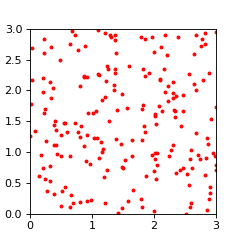

<IPython.core.display.Javascript object>


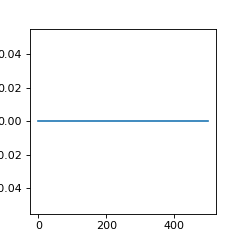

In [15]:
c = Const()
curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3))
plt.plot(np.diff(curve))